<a href="https://colab.research.google.com/github/SimonBurmer/Git-Commands/blob/master/Tensorflow_Sklearn_Heart_Disease_Dataset_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction 

---

This is my data analytics for the popular heart disease dataset. In this analytics i tested how different classifier and a keras model perform on different feature engineered datasets.

*  raw data:
  *  x_train, x_test, y_train, y_test 

*  raw data with one-hot encodet categorical cloums:
  *  x_train_pp, x_test_pp, y_train_pp, y_test_pp 

*  raw data with one-hot encodet categorical cloums after standardization:
  *  x_train_pp_st, x_test_pp_st, y_train_pp_st, y_test_pp_st



# Upload file

---



In [0]:
from gwoogle.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv



# Load und Show Datafram

---



Data contains;



*   age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
* chol - serum cholestoral in mg/dl
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg - resting electrocardiographic results
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
* slope - the slope of the peak exercise ST segment
* ca - number of major vessels (0-3) colored by flourosopy
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
* target - have disease or not (1=yes, 0=no)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import io


# Load dataset
df_heart = pd.read_csv(io.StringIO(uploaded['heart.csv'].decode('utf-8')))
display(df_heart.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Analyze data

---



In [0]:
df_heart.isnull().sum().sort_values(ascending = False) #show number of nan Values

target      0
thal        0
ca          0
slope       0
oldpeak     0
exang       0
thalach     0
restecg     0
fbs         0
chol        0
trestbps    0
cp          0
sex         0
age         0
dtype: int64

In [0]:
print(48*"-")
display(df_heart.describe())
print(48*"-")
print(df_heart.shape) #303 entries and 14 features
print(48*"-")

------------------------------------------------


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


------------------------------------------------
(303, 14)
------------------------------------------------


In [0]:
df_heart.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


**show dependencies**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


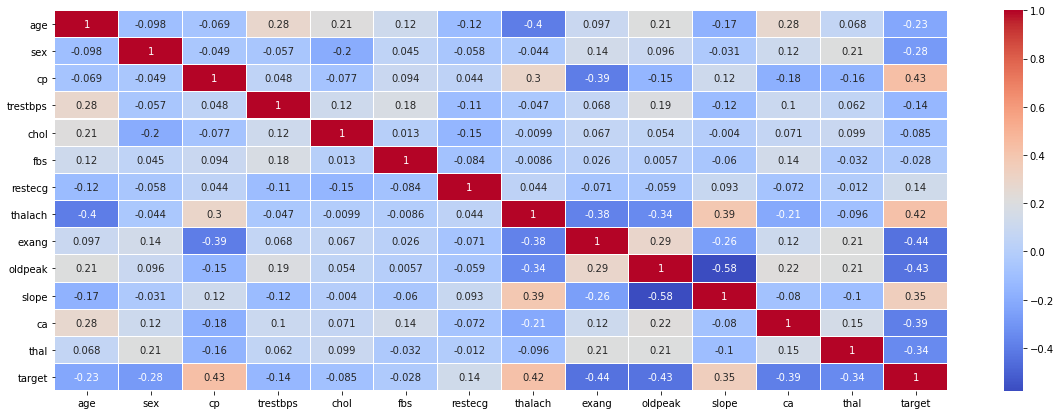

In [0]:
import seaborn as sns
plt.figure(figsize=(20,7))
sns.heatmap(df_heart.corr(),linewidths=.01, annot = True, cmap='coolwarm')
plt.show()

**Plot data**

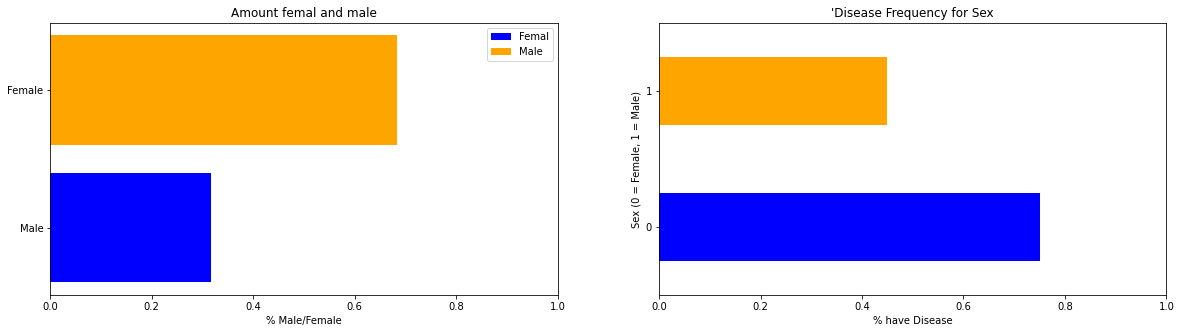

In [0]:


plt.figure(figsize= (20,5))
plt.subplot(1,2,1)
meanFemale = len(df_heart[df_heart.sex == 0])/len(df_heart)
meanMale = len(df_heart[df_heart.sex == 1])/len(df_heart)
plt.title("Amount femal and male")
plt.barh("Male", meanFemale,label=  "Femal", color = "blue")
plt.barh("Female", meanMale, label = "Male",color = "orange")
plt.xlabel('% Male/Female')
plt.xlim(xmax = 1)
plt.legend()


colors = ["blue","orange"]

plt.subplot(1,2,2)
df_heart.groupby('sex').target.mean().plot(kind='barh', color=colors)
plt.title("'Disease Frequency for Sex")
plt.xlabel('% have Disease')
plt.ylabel('Sex (0 = Female, 1 = Male)')
plt.xlim(xmax = 1)
plt.show()

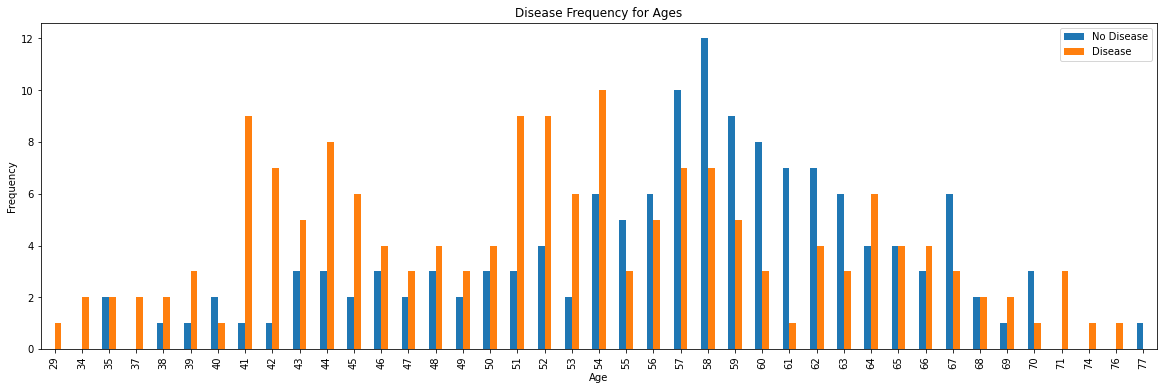

In [0]:
pd.crosstab(df_heart.age,df_heart.target).plot(kind="bar",figsize=(20,6))
plt.title('Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(["No Disease","Disease"])
plt.show()

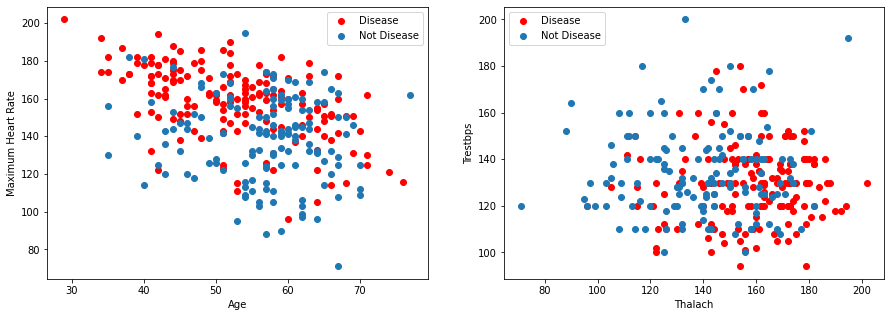

In [0]:
plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
plt.scatter(x=df_heart.age[df_heart.target==1], y=df_heart.thalach[(df_heart.target==1)], c="red")
plt.scatter(x=df_heart.age[df_heart.target==0], y=df_heart.thalach[(df_heart.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")


plt.subplot(1,2,2)
plt.scatter(x=df_heart.thalach[df_heart.target==1], y=df_heart.trestbps[(df_heart.target==1)], c="red")
plt.scatter(x=df_heart.thalach[df_heart.target==0], y=df_heart.trestbps[(df_heart.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Thalach")
plt.ylabel("Trestbps")
plt.show()

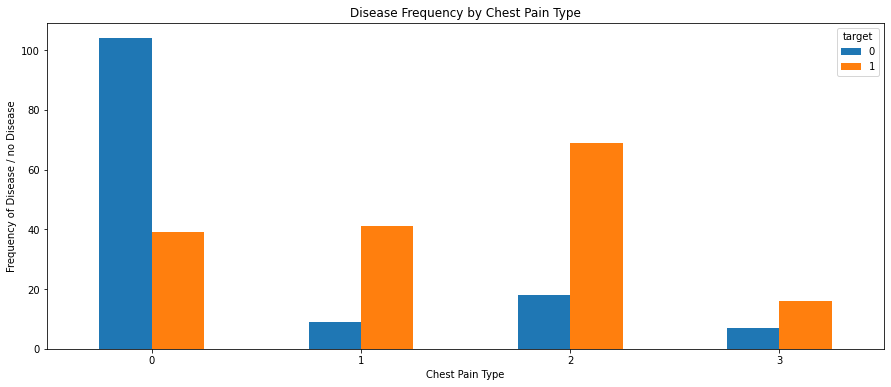

In [0]:
pd.crosstab(df_heart.cp,df_heart.target).plot(kind="bar",figsize=(15,6))
plt.title('Disease Frequency by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease / no Disease')
plt.show()

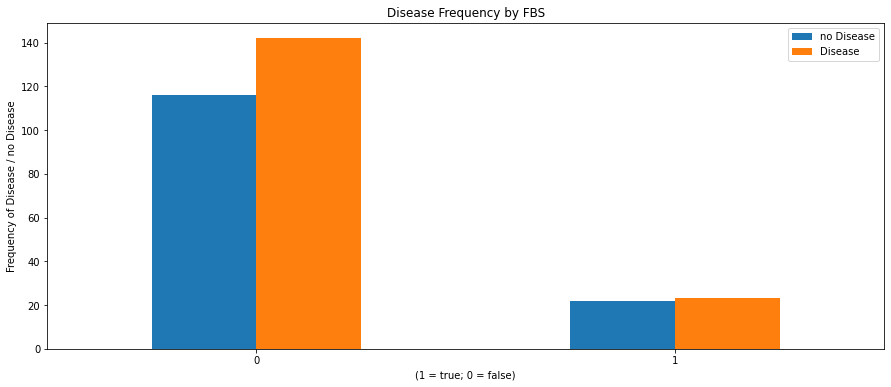

In [0]:
pd.crosstab(df_heart.fbs,df_heart.target).plot(kind="bar",figsize=(15,6))
plt.title('Disease Frequency by FBS')
plt.xlabel('(1 = true; 0 = false)')
plt.legend(["no Disease", "Disease"])
plt.ylabel('Frequency of Disease / no Disease')
plt.xticks(rotation = 0)
plt.show()

# **Data Preprocessing**

---



'target', 'cp', 'thal' and 'slope' are categorical variables thats why i turn them into dummy variables.

In [0]:
hot_cp = pd.get_dummies(df_heart['cp'], prefix = "cp")
hot_thal = pd.get_dummies(df_heart['thal'], prefix = "thal")
hot_slope = pd.get_dummies(df_heart['slope'], prefix = "slope")

Y = df_heart['target']
X = df_heart.drop("target", axis=1)
Y_pp = pd.get_dummies(Y, prefix = "target")

print(48*"-")
print(df_heart.slope.head())
print(48*"-")
print("becoms:")
print(48*"-")
print(hot_slope.head())
print(48*"-")

------------------------------------------------
0    0
1    0
2    2
3    2
4    2
Name: slope, dtype: int64
------------------------------------------------
becoms:
------------------------------------------------
   slope_0  slope_1  slope_2
0        1        0        0
1        1        0        0
2        0        0        1
3        0        0        1
4        0        0        1
------------------------------------------------


In [0]:
X_pp = df_heart.drop(["cp","thal","slope","target"], axis=1)
X_pp = pd.concat([X_pp,hot_cp,hot_thal,hot_slope], axis=1)
display(X_pp.head())

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,0,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,0,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,0,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,0,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,0,0,0,0,0,1,0,0,0,1


**Normalize Data**

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Y_pp_st = scaler.fit_transform(Y_pp)
Y_pp_st = pd.DataFrame(data=Y_pp_st)

X_pp_st = scaler.fit_transform(X_pp)
X_pp_st = pd.DataFrame(data=X_pp_st)
display(X_pp_st.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.952197,0.681005,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-0.714429,-0.945384,-0.444554,-0.634648,3.489114,-0.081514,3.979112,-1.100763,-0.793116,3.664502,-0.926766,-0.939142
1,-1.915313,0.681005,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-0.714429,-0.945384,-0.444554,1.575677,-0.286606,-0.081514,-0.251312,0.908461,-0.793116,3.664502,-0.926766,-0.939142
2,-1.474158,-1.468418,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,-0.714429,-0.945384,2.249444,-0.634648,-0.286606,-0.081514,-0.251312,0.908461,-0.793116,-0.272888,-0.926766,1.064802
3,0.180175,0.681005,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,-0.714429,-0.945384,2.249444,-0.634648,-0.286606,-0.081514,-0.251312,0.908461,-0.793116,-0.272888,-0.926766,1.064802
4,0.290464,-1.468418,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,-0.714429,1.057772,-0.444554,-0.634648,-0.286606,-0.081514,-0.251312,0.908461,-0.793116,-0.272888,-0.926766,1.064802


In [0]:
from sklearn.model_selection import train_test_split

# Split the data set into training and testing
#raw data
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2,random_state=0)
#Hot encoded data 
x_train_pp, x_test_pp, y_train_pp, y_test_pp = train_test_split(X_pp,Y,test_size = 0.2,random_state=0)
#Hot encoded and standardized data
x_train_pp_st, x_test_pp_st, y_train_pp_st, y_test_pp_st = train_test_split(X_pp_st,Y,test_size = 0.2,random_state=0)


Xtrain = [x_train,x_train_pp,x_train_pp_st]
Ytrain = [y_train,y_train_pp,y_train_pp_st]
Xtest =[x_test,x_test_pp,x_test_pp_st]
Ytest =[y_test,y_test_pp,y_test_pp_st]

# **Sklearn Classifiers**

---



# LogisticRegression

------------------------------------------------------------------------------------------------
accuracy:  0.8524590163934426
------------------------------------------------------------------------------------------------
cross_val:  [0.83870968 0.83870968 0.80645161 0.9        0.86666667 0.76666667
 0.9        0.83333333 0.7        0.73333333]
------------------------------------------------------------------------------------------------


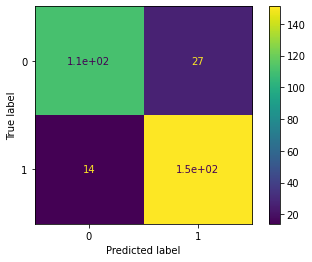

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics #for checking the model accuracy

scores = {}

model = LogisticRegression()
model.fit(x_train_pp_st, y_train_pp_st)
score_lr = model.score(x_test_pp_st, y_test_pp_st)
scores["LogisticRegression"] = score_lr

print("--" *48)
print("accuracy: ",score_lr)
print("--" *48)
print("cross_val: ",cross_val_score(model, X_pp_st, Y, cv=10))
print("--" *48)


metrics.plot_confusion_matrix(model,X_pp_st,Y)
plt.show()

# DecisionTreeClassifier

Model 0: Normal data  /  Model 1: Hot encoded data / Model 2: Hot encoded and standardized data
------------------------------------------------------------------------------------------------
accuracy Model 0 : 0.7704918032786885
------------------------------------------------------------------------------------------------
accuracy Model 1 : 0.7868852459016393
------------------------------------------------------------------------------------------------
accuracy Model 2 : 0.7868852459016393


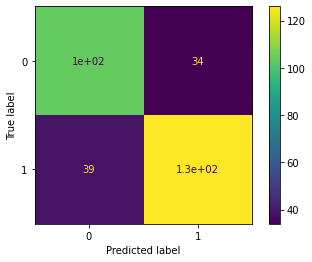

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import graphviz 


print("Model 0: Normal data  /  Model 1: Hot encoded data / Model 2: Hot encoded and standardized data")
for i in range(3):  
  model = DecisionTreeClassifier()
  model.fit(Xtrain[i], Ytrain[i])
  score_dt = model.score(Xtest[i], Ytest[i])
  scores["DecisionTreeClassifier"] = score_dt
  print("--" *48)
  print("accuracy Model",i,":", score_dt)


metrics.plot_confusion_matrix(model,X_pp,Y)
plt.show()

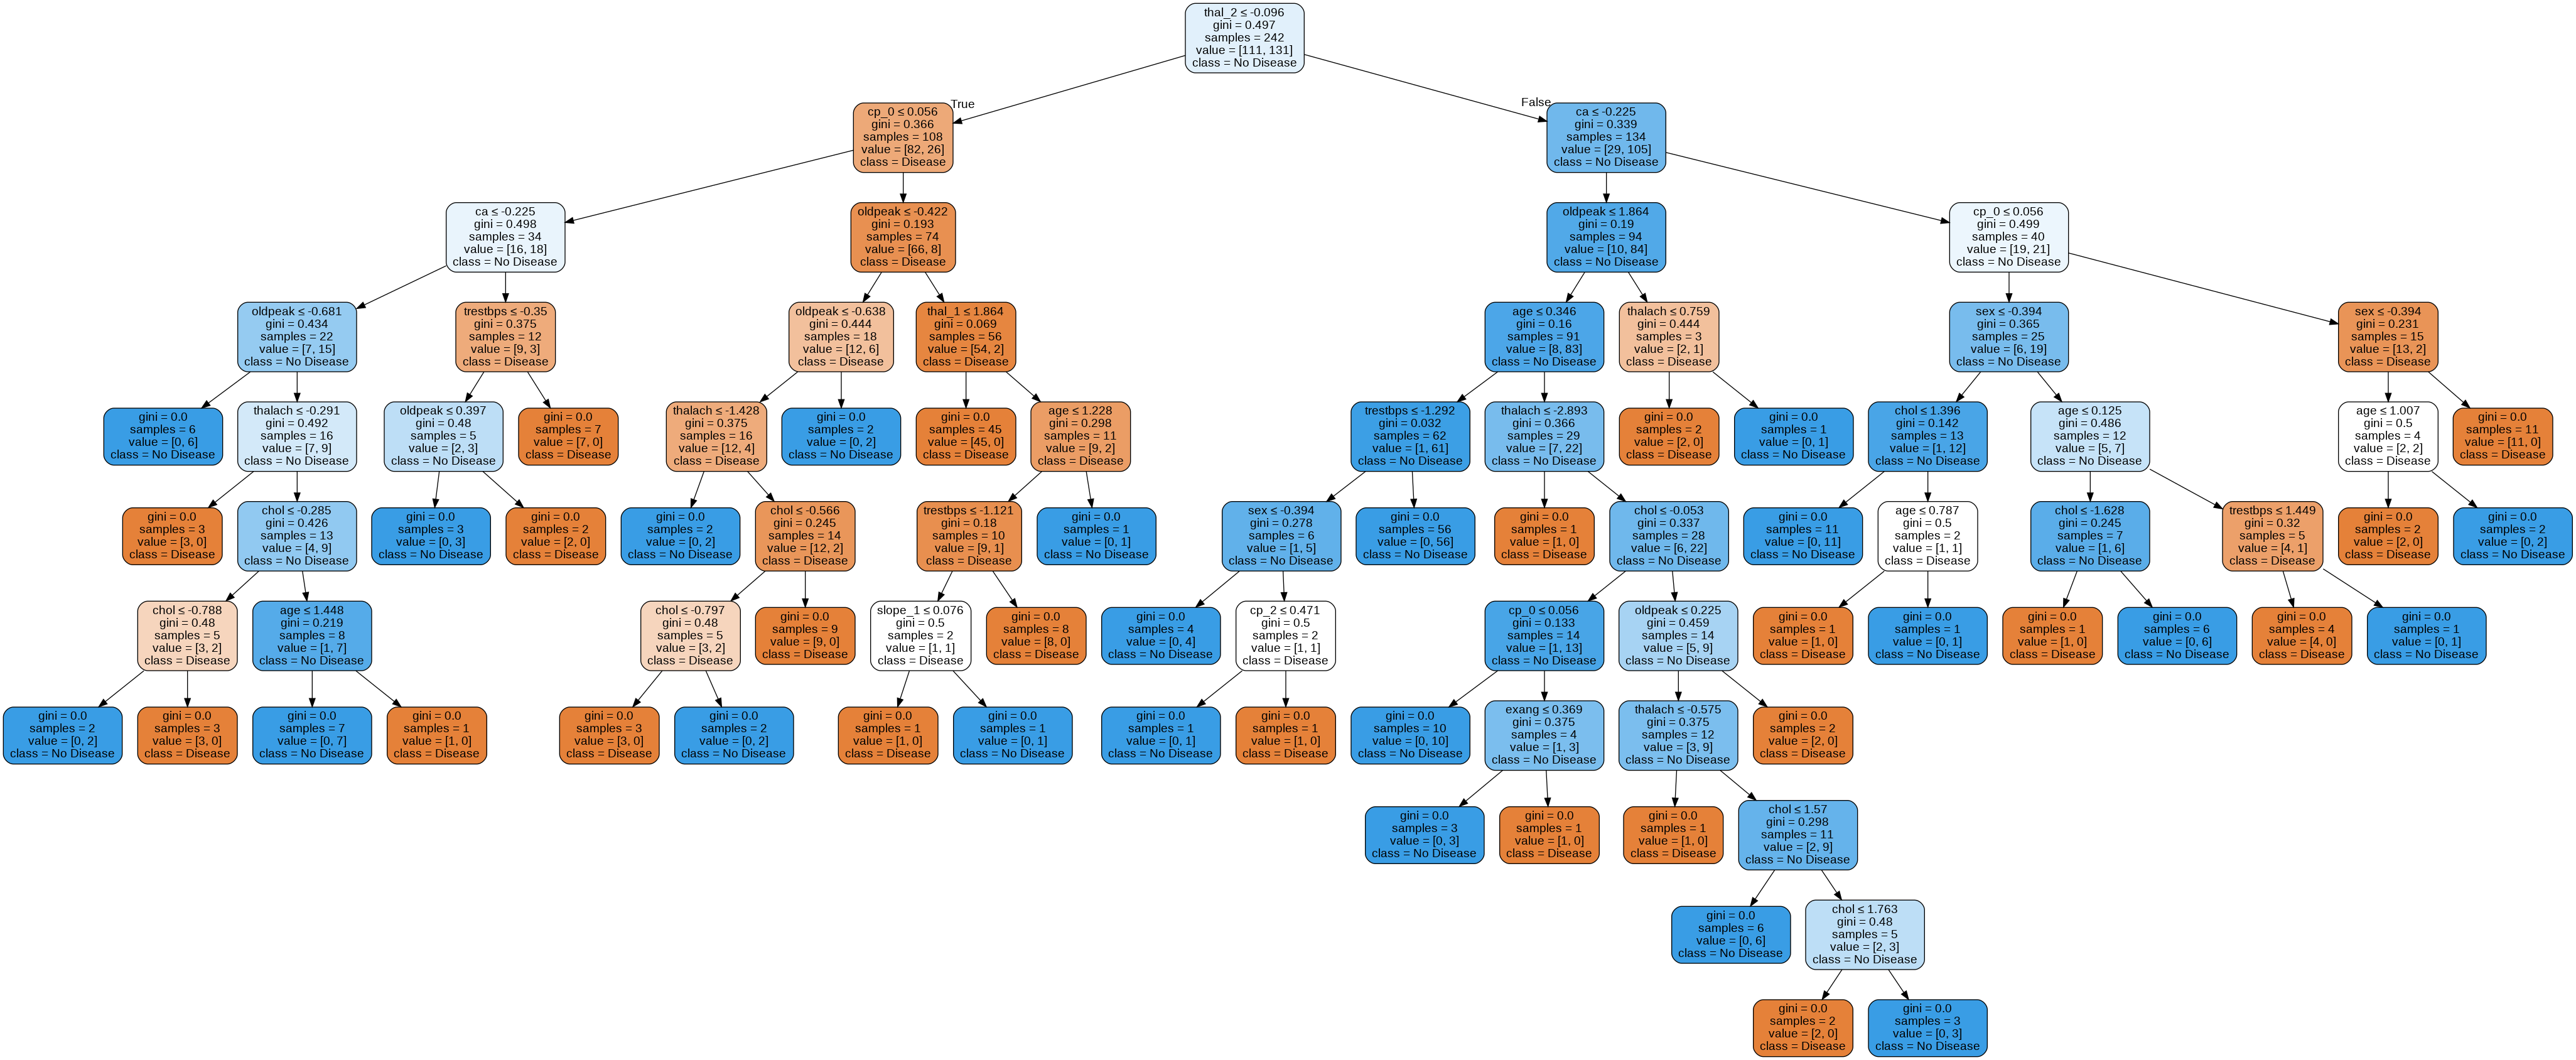

In [0]:
from IPython.display import Image

dot_data = export_graphviz(model, feature_names= list(X_pp.columns),  class_names= ["Disease","No Disease"],filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render(format="png")
Image("Source.gv.png", height= 450)


# K-Nearest Neighbours

Model 0: Normal data  /  Model 1: Hot encoded data / Model 2: Hot encoded and standardized data
------------------------------------------------------------------------------------------------
accuracy Model 0 : 0.7213114754098361
------------------------------------------------------------------------------------------------
accuracy Model 1 : 0.7213114754098361
------------------------------------------------------------------------------------------------
accuracy Model 2 : 0.8852459016393442
                                                
best model params: 
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}


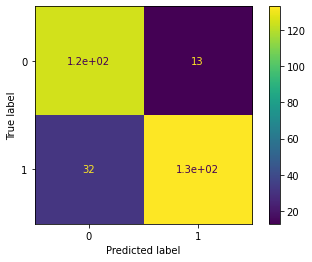

In [0]:
from sklearn.neighbors import KNeighborsClassifier


print("Model 0: Normal data  /  Model 1: Hot encoded data / Model 2: Hot encoded and standardized data")
for i in range(3):  
    best_acc = 0
    scoreList = []
    # try ro find best k value
    for neighbors in range(1, 20):
        for weights in ['uniform', 'distance']:
            #model looks for the 1-20 closest datapoints
            model = KNeighborsClassifier(n_neighbors=neighbors, weights=weights)
            model.fit(Xtrain[i], Ytrain[i])
            acc = model.score(Xtest[i], Ytest[i])
            scoreList.append(acc)
            if acc > best_acc:      
                best_acc = acc
                best_model = model
    
    score_kn = best_acc
    print("--" *48)
    print("accuracy Model",i,":", score_kn)
  

scores["K-Nearest Neighbours"] = score_kn
print(" " *48)
print("best model params: ")
print(best_model.get_params())

metrics.plot_confusion_matrix(best_model,X_pp_st,Y)
plt.show()

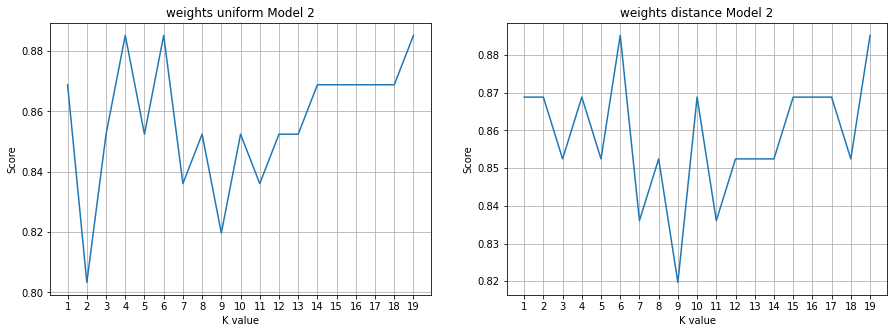

In [0]:
uniformList = scoreList.copy()
del uniformList[1::2]  # delete every second element, starting from the second
del scoreList[::2]  # delete every second element (deleting from the first)

plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
plt.plot(range(1,20),uniformList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.title("weights uniform Model 2")
plt.grid("True")

plt.subplot(1,2,2)
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.title("weights distance Model 2")
plt.grid("True")
plt.show()


# Support Vector Machine (SVM)

Model 0: Normal data  /  Model 1: Hot encoded data / Model 2: Hot encoded and standardized data
------------------------------------------------------------------------------------------------
accuracy Model 0 : 0.8360655737704918
------------------------------------------------------------------------------------------------
accuracy Model 1 : 0.8524590163934426
------------------------------------------------------------------------------------------------
accuracy Model 2 : 0.9016393442622951
                                                                                                
best model params: 
{'C': 3, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


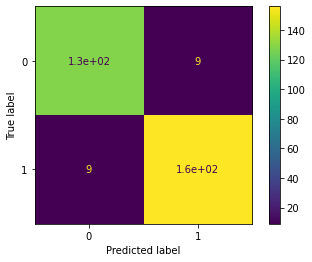

In [0]:
from sklearn import svm

print("Model 0: Normal data  /  Model 1: Hot encoded data / Model 2: Hot encoded and standardized data")
for i in range(3):  
    best_acc = 0
    scoreList = []
    for kernel in ['linear', 'rbf', 'sigmoid','poly']:  # poly kernel isnt useful here
        for c in [0.1,0.5,1,3,10,20]:
            model = svm.SVC(kernel=kernel, C=c)
            model.fit(Xtrain[i], Ytrain[i])
            acc = model.score(Xtest[i], Ytest[i])
            scoreList.append(acc)
            if acc > best_acc:      
                best_acc = acc
                best_model = model
    
    score_sv = best_acc
    print("--" *48)
    print("accuracy Model",i,":", score_sv)


scores["Support Vector Machine (SVM)"] = score_sv

print("  " *48)
print("best model params: ")
print(best_model.get_params())

metrics.plot_confusion_matrix(best_model,X_pp_st,Y)
plt.show()


# K-Means

------------------------------------------------------------------------------------------------
accuracy:  0.43388429752066116
------------------------------------------------------------------------------------------------
accuracy:  0.43388429752066116
------------------------------------------------------------------------------------------------
accuracy:  0.7975206611570248


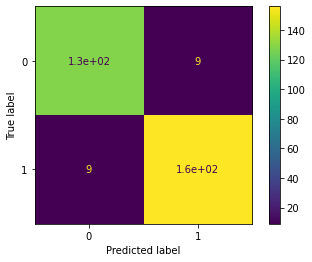

In [0]:
from sklearn.cluster import KMeans

def acc(model, X_test, Y_test):
    prediction = model.predict(X_test)
    correct = 0
    for i,Y in enumerate(Y_test):
      if prediction[i] == Y:
        correct = correct +1

    acc = correct / len(X_test)
    return acc

for i in range(3): 
    #n_init:Number of time the k-means algorithm will be run with different centroid seeds.
    model = KMeans(n_clusters=2, init="k-means++", n_init=10)
    model.fit(Xtrain[i])
    score_km = acc(model,Xtrain[i], Ytrain[i])
    scores["K-Means"] = score_km
    print("--" *48)
    print("accuracy: ",score_km)


metrics.plot_confusion_matrix(best_model,X_pp_st,Y)
plt.show()

# Keras Model

In [0]:
# Split the data set into training and testing / With Y_pp and Y_pp_st !

#raw data
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2,random_state=0)
#Hot encoded data 
x_train_pp, x_test_pp, y_train_pp, y_test_pp = train_test_split(X_pp,Y_pp,test_size = 0.2,random_state=0)
#Hot encoded and standardized data
x_train_pp_st, x_test_pp_st, y_train_pp_st, y_test_pp_st = train_test_split(X_pp_st,Y_pp_st,test_size = 0.2,random_state=0)


Xtrain = [x_train,x_train_pp,x_train_pp_st]
Ytrain = [y_train,y_train_pp,y_train_pp_st]
Xtest =[x_test,x_test_pp,x_test_pp_st]
Ytest =[y_test,y_test_pp,y_test_pp_st]

In [0]:
from tensorflow.keras import layers, models 
from tensorflow import keras

myModels = []

for i, df in enumerate([x_train,x_train_pp,x_train_pp_st]):
  # create model with fully connected layers with dropout regulation
  model = models.Sequential(name= str(i+1))   # name has to be a String !!!!!!
  model.add(layers.Dense(12, input_dim=df.shape[1], kernel_initializer='uniform', activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(6, kernel_initializer='uniform', activation='relu'))
  model.add(layers.Dropout(0.1))
  outputsh = 2 if i > 0 else 1
  model.add(layers.Dense(outputsh, kernel_initializer='uniform', activation='sigmoid'))

  # Compile model
  model.compile(loss='mean_squared_error', optimizer="Adamax", metrics=['accuracy']) #'binary_crossentropy' is also a good choice
  myModels.append(model)

myModels[1].summary()

Model: "2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_248 (Dense)            (None, 12)                264       
_________________________________________________________________
dropout_164 (Dropout)        (None, 12)                0         
_________________________________________________________________
dense_249 (Dense)            (None, 6)                 78        
_________________________________________________________________
dropout_165 (Dropout)        (None, 6)                 0         
_________________________________________________________________
dense_250 (Dense)            (None, 2)                 14        
Total params: 356
Trainable params: 356
Non-trainable params: 0
_________________________________________________________________


In [0]:
#train Models

history_list = []

for i in range(3): 
    print('Model name:', myModels[i].name)
    history = myModels[i].fit(Xtrain[i], Ytrain[i], batch_size=5, epochs=100, verbose=0,validation_data=(Xtest[i], Ytest[i]), )  
    history_list.append(history)
    score = myModels[i].evaluate(Xtest[i], Ytest[i], verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print(" ")

scores["Keras Model"] = score[1]

Model name: 1
Test loss: 0.13558194041252136
Test accuracy: 0.7868852615356445
 
Model name: 2
Test loss: 0.11379174143075943
Test accuracy: 0.8360655903816223
 
Model name: 3
Test loss: 0.6987382173538208
Test accuracy: 0.868852436542511
 


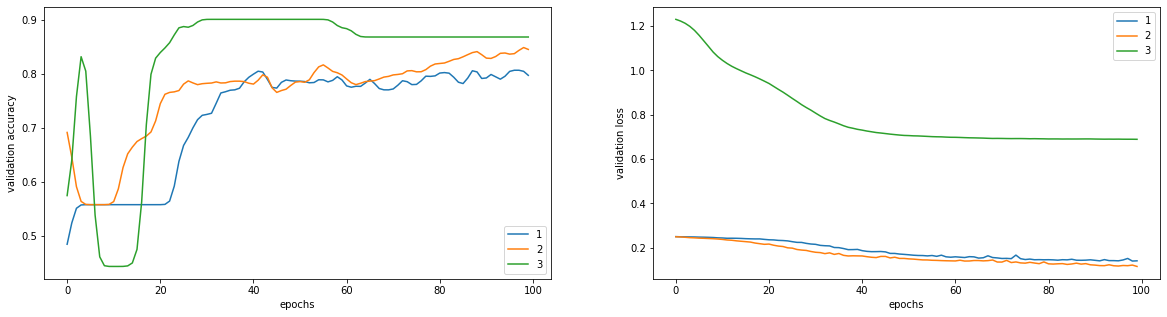

In [0]:
from scipy.ndimage.filters import gaussian_filter1d


# Plot training & validation loss values
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))

for i, history in enumerate(history_list):
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    smooth_val_acc = gaussian_filter1d(val_acc, sigma=1)
    ax1.plot(smooth_val_acc, label=myModels[i].name)
    ax2.plot(val_loss, label=myModels[i].name)
    #train_acc = history.history['accuracy']
    #train_loss = history.history['loss']
    #ax1.plot(train_acc, label=myModels[i].name)
    #ax2.plot(train_loss, label=myModels[i].name)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax1.set_xlabel('epochs')
ax2.set_xlabel('epochs')
ax1.legend()

ax2.legend()
plt.show()

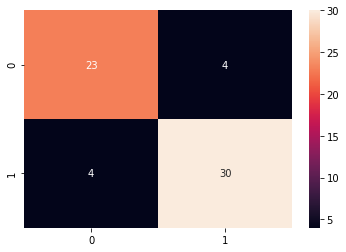

In [0]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import seaborn as sns

predic = myModels[2].predict(x_test_pp_st)

predicList = np.argmax(myModels[2].predict(x_test_pp_st),axis=1)
y_testList = y_test.tolist()

cm = confusion_matrix(y_testList,predicList)

sns.heatmap(cm,annot=True,fmt='.5g') 
plt.show()

In [0]:
print("Model prediction test")
print ("#  original | predicted  | probability  ")
for idx, label in enumerate(y_test[30:40]):
    print ("%s     | %s  | %s |           %.2f%%" % (str(idx+30), str(label), str(predicList[idx]), float(max(predic[idx]))*100))


Model prediction test
#  original | predicted  | probability  
30     | 0  | 0 |           90.77%
31     | 0  | 0 |           11.54%
32     | 1  | 1 |           13.56%
33     | 1  | 0 |           95.01%
34     | 1  | 0 |           87.21%
35     | 0  | 0 |           67.09%
36     | 0  | 0 |           90.20%
37     | 1  | 0 |           88.20%
38     | 0  | 0 |           95.79%
39     | 0  | 0 |           96.42%


# **Comparing Models**

---


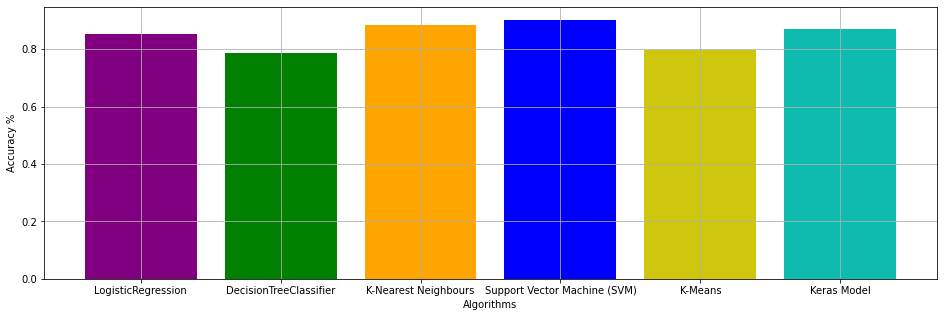

Support Vector Machine (SVM) : 0.9016393442622951


In [0]:
import seaborn as sns

colors = ["purple", "green", "orange", "blue","#CFC60E","#0FBBAE"]


plt.figure(figsize=(16,5))
plt.bar(x=scores.keys(), height= scores.values(), color = colors)
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.grid("True")
plt.show()

print(list(scores.keys())[list(scores.values()).index(max(scores.values()))], ":",max(scores.values()))